<a href="https://colab.research.google.com/github/xtreegold/NNs/blob/main/Predictor_de_temperatura_2_0_(m%C3%BAltiples_capas_y_neuronas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#primero importamos tensorflow y numpy
import tensorflow as tf

In [2]:
import numpy as np

In [12]:
#Aquí definimos las variables que tienen una correlación lineal, en este caso los meses están representados por números, las temperaturas en Celcius.
mes = np.array([1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10 ,11 ,12], dtype=float)
temperatura = np.array([7, 7.9, 9, 10.8, 14.1, 17.9, 20.8, 21.4, 18.6, 14.5, 10.4, 8.1], dtype=float)


In [13]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [19]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'

)

In [23]:
print("Comenzando entrenamiento de la red...")
historial = modelo.fit(mes, temperatura, epochs=500, verbose=False)
print ("Modelo entrenado!")


Comenzando entrenamiento de la red...
Modelo entrenado!


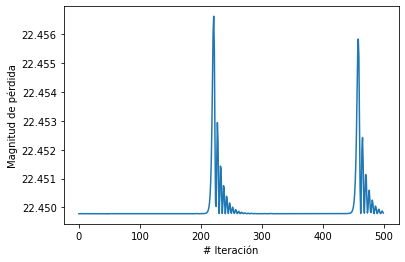

In [24]:
import matplotlib.pyplot as plt
plt.xlabel("# Iteración")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


In [27]:
print("Test de conversión de red neuronal")
resultado = modelo.predict([22])
print ("La temperatura en enero del año siguiente será de " + str(resultado) + " Celsius")

#el modelo tiene problemas para predecir temperaturas bajas, pero mejoró respecto a la predicción lineal de la primera versión.

Test de conversión de red neuronal
La temperatura en enero del año siguiente será de [[20.79494]] Celsius


In [11]:
print ("Variables internas del modelo")
print (salida.get_weights())

Variables internas del modelo
[array([[-1.3957589 ],
       [ 0.27936625],
       [ 0.1275041 ]], dtype=float32), array([0.64857924], dtype=float32)]
